In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from ta.momentum import RSIIndicator
from ta.trend import MACD, SMAIndicator


In [17]:
ticker = 'AAPL'
df = yf.download(ticker, start='2015-01-01', end='2024-01-01')


[*********************100%***********************]  1 of 1 completed


In [21]:
df['SMA_10'] = SMAIndicator(close_series, window=10).sma_indicator()
df['SMA_50'] = SMAIndicator(close_series, window=50).sma_indicator()
df['RSI'] = RSIIndicator(close_series, window=14).rsi()
macd = MACD(close_series)
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()


In [22]:
df['Target'] = df['Close'].shift(-1)

In [23]:
df.dropna(inplace=True)

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_10', 'SMA_50', 'RSI', 'MACD', 'MACD_signal']
X = df[features]
y = df['Target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [34]:
rf_preds = rf_model.predict(X_test)
lr_preds = lr_model.predict(X_test)


In [35]:
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Random Forest R^2:", r2_score(y_test, rf_preds))

Random Forest RMSE: 7.954161389233926
Random Forest R^2: 0.8191676036666137


In [36]:
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("Linear Regression R^2:", r2_score(y_test, lr_preds))

Linear Regression RMSE: 2.8366631876702244
Linear Regression R^2: 0.9770013160134413


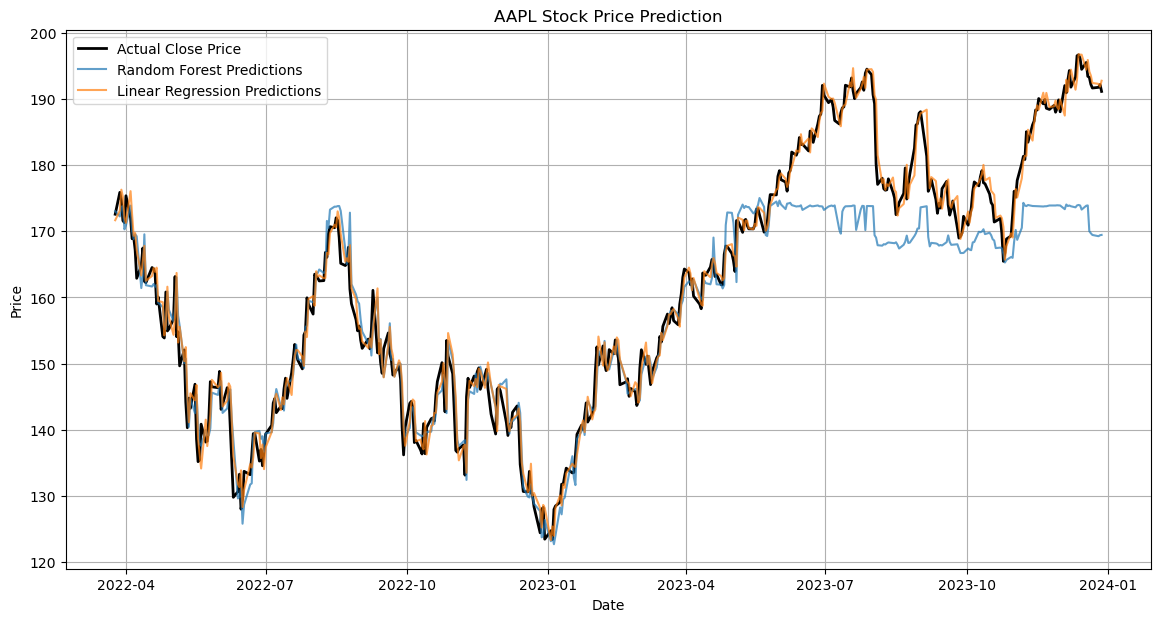

In [37]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test.values, label='Actual Close Price', color='black', linewidth=2)
plt.plot(y_test.index, rf_preds, label='Random Forest Predictions', alpha=0.7)
plt.plot(y_test.index, lr_preds, label='Linear Regression Predictions', alpha=0.7)
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()